## Comparative by county in US 

#### We analyze how employment, wages and the number of factories in Mexico evolved between 2007 and 2021. Also between 2016 and 2021

#### The border counties are:  San Diego', 'Imperial', 'Yuma', 'Pima', 'Santa Cruz', 'Cochise', 'Hidalgo', 'Luna' , 'Doña Ana','El Paso','Hudspeth' ,'Jeff Davis','Presidio', 'Brewster', 'Terrell' ,'Val Verde', 'Kinney' ,'Maverick', 'Webb' ,'Zapata', 'Starr' ,'Hidalgo', 'Cameron'


In [9]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [10]:
## small trick to improve our display
## Unfortunately appears not to work in Colab.
## will allow us to see dataframes side-by-side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [11]:
## run the display code here
pd.options.display.float_format = '{:,.2f}'.format

In [13]:
#Open Manufacturing workers data
df = pd.read_csv("data/jobs-wages-population-us-merged.csv")
df

,State,Description,Year,Value,Border
0,Alabama,Total Jobs,1998,"1,916,323.00",No
1,Alabama,Construction Jobs,1998,"150,643.00",No
2,Alabama,Manufacturing Jobs,1998,"371,319.00",No
3,Alabama,Transportation Jobs,1998,"70,796.00",No
4,Alaska,Total Jobs,1998,"285,610.00",No
...,...,...,...,...,...
11019,Washington,Population,2022,"7,785,786.00",No
11020,West Virginia,Population,2022,"1,775,156.00",No
11021,Wisconsin,Population,2022,"5,892,539.00",No
11022,Wyoming,Population,2022,"581,381.00",No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024 entries, 0 to 11023
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        11024 non-null  object 
 1   Description  11024 non-null  object 
 2   Year         11024 non-null  int64  
 3   Value        10974 non-null  float64
 4   Border       11024 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 430.8+ KB


In [8]:
df2 = pd.pivot_table(df.query("State == 'Baja California'") , values='Manufacturing workers', index=['Year'], columns='City').copy()
df2

KeyError: 'Manufacturing workers'

In [7]:
dfcal = pd.DataFrame()
for i in df2.columns:
    dfcal[i] = df2[i] / df2[i].iat[0] * 100 

In [8]:
dfcal.rename(columns = {"Total": "Total Baja California"}, inplace = True)
dfcal["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
dfcal
df2["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df2.rename(columns = {"Total": "Total Baja California"}, inplace = True)


In [9]:
df2

City,Ensenada,Mexicali,Tecate,Tijuana,Total Baja California,Year
Year,,,,,,
2007,"14,839.83","57,068.50","12,328.50","174,626.33","258,863.17",2007
2008,"15,316.25","54,761.17","12,159.08","164,272.50","246,509.00",2008
2009,"14,062.58","44,678.17","10,176.00","137,413.58","206,330.33",2009
2010,"14,526.17","47,359.17","10,704.58","146,236.50","218,826.42",2010
2011,"15,496.58","46,761.17","10,738.33","148,282.33","221,278.42",2011
2012,"17,072.33","48,285.25","11,412.50","154,960.67","231,730.75",2012
2013,"17,251.50","50,956.25","11,629.67","165,775.00","245,612.42",2013
2014,"19,227.00","53,369.08","11,735.75","180,796.75","265,128.58",2014
2015,"20,435.75","57,588.25","11,846.33","194,946.33","284,816.67",2015


In [10]:
df3 = pd.pivot_table(df.query("State == 'Sonora'") , values='Manufacturing workers', index=['Year'], columns='City').copy()
df3

City,Hermosillo,Nogales,Otros municipios,Total
Year,,,,
2007,"22,002.17","28,033.33","53,286.33","103,321.83"
2008,"21,240.17","27,317.92","46,880.17","95,438.25"
2009,"18,182.92","22,523.92","41,157.92","81,864.75"
2010,"21,052.17","24,850.50","44,938.00","90,840.67"
2011,"22,435.67","27,168.50","47,572.75","97,176.92"
2012,"23,830.75","28,796.25","49,443.42","102,070.42"
2013,"24,901.75","32,209.42","53,468.50","110,579.67"
2014,"26,068.08","32,379.75","53,652.75","112,100.58"
2015,"25,566.17","30,950.50","55,434.83","111,951.50"


In [11]:
dfson = pd.DataFrame()
for i in df3.columns:
    dfson[i] = df3[i] / df3[i].iat[0] * 100 

In [12]:
dfson["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
dfson
df3["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df3.rename(columns = {"Total": "Total Sonora"}, inplace = True)

In [13]:
dfson.rename(columns = {"Total": "Total Sonora"}, inplace = True)
dfson

,Hermosillo,Nogales,Otros municipios,Total Sonora,Year
Year,,,,,
2007,100.00,100.00,100.00,100.00,2007
2008,96.54,97.45,87.98,92.37,2008
2009,82.64,80.35,77.24,79.23,2009
2010,95.68,88.65,84.33,87.92,2010
2011,101.97,96.91,89.28,94.05,2011
2012,108.31,102.72,92.79,98.79,2012
2013,113.18,114.90,100.34,107.02,2013
2014,118.48,115.50,100.69,108.50,2014
2015,116.20,110.41,104.03,108.35,2015


In [14]:
df4 = pd.pivot_table(df.query("State == 'Tamaulipas'") , values='Manufacturing workers', index=['Year'], columns='City').copy()
dftam = pd.DataFrame()
for i in df4.columns:
    dftam[i] = df4[i] / df4[i].iat[0] * 100 
dftam.rename(columns = {"Total": "Total Tamaulipas"}, inplace = True)
dftam["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
dftam
df4["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df4.rename(columns = {"Total": "Total Tamaulipas"}, inplace = True)


In [15]:
df5 = pd.pivot_table(df.query("State == 'Coahuila de Zaragoza'") , values='Manufacturing workers', index=['Year'], columns='City').copy()
dfcoa = pd.DataFrame()
for i in df5.columns:
    dfcoa[i] = df5[i] / df5[i].iat[0] * 100 
dfcoa.rename(columns = {"Total": "Total Coahuila"}, inplace = True)
dfcoa["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
dfcoa
df5["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df5.rename(columns = {"Total": "Total Coahuila"}, inplace = True)


In [16]:
df6 = pd.pivot_table(df.query("State == 'Chihuahua'") , values='Manufacturing workers', index=['Year'], columns='City').copy()
dfchi = pd.DataFrame()
for i in df6.columns:
    dfchi[i] = df6[i] / df6[i].iat[0] * 100 
dfchi.rename(columns = {"Total": "Total Chihuahua"}, inplace = True)
dfchi["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
dfchi
df6["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df6.rename(columns = {"Total": "Total Chihuahua"}, inplace = True)


In [17]:
df7 = pd.pivot_table(df.query("State == 'Nuevo Leon'") , values='Manufacturing workers', index=['Year'], columns='City').copy()
dfnl = pd.DataFrame()
for i in df7.columns:
    dfnl[i] = df7[i] / df7[i].iat[0] * 100 
dfnl.rename(columns = {"Total": "Total Nuevo Leon"}, inplace = True)
dfnl["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
dfnl
df7["Year"] = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df7.rename(columns = {"Total": "Total Nuevo Leon"}, inplace = True)


### Conclusions
##### Among the states where manufacturing employment grew the most, some are not on the border. 
##### That is the case of Guanajuato, Queretaro, San Luis Potosi or Durango. ( Although Durango is close to the border.)
#### Four of the six border states are above the national average. The only exceptions are Nuevo Leon and Sonora.
#### This may indicate two possibilities: 
#### 1. The nearshoring effect is not concentrated exclusively at the border. 
#### 2. Other simultaneous phenomena may be driving manufacturing employment upward in Mexico. 

In [18]:
dfcal.columns

Index(['Ensenada', 'Mexicali', 'Tecate', 'Tijuana', 'Total Baja California',
       'Year'],
      dtype='object')

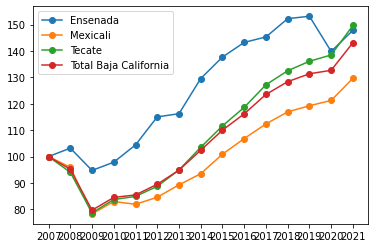

In [19]:
# Create a graphic 

x1 = dfcal["Year"]
y1 = dfcal["Ensenada"]

x2 = dfcal["Year"]
y2 = dfcal["Mexicali"]

x3 = dfcal["Year"]
y3 = dfcal["Tecate"]

x3 = dfcal["Year"]
y3 = dfcal["Tijuana"]

x4 = dfcal["Year"]
y4 = dfcal["Total Baja California"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Ensenada")
ax.plot(x2, y2, marker = "o", label = "Mexicali")
ax.plot(x3, y3, marker = "o", label = "Tecate")
ax.plot(x4, y4, marker = "o", label = "Total Baja California")

ax.legend()

# plt.show()

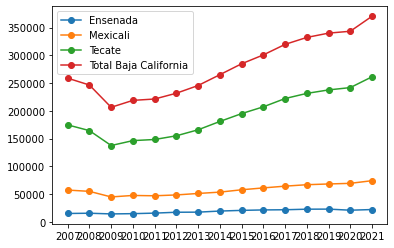

In [20]:
# Create a graphic 

x1 = df2["Year"]
y1 = df2["Ensenada"]

x2 = df2["Year"]
y2 = df2["Mexicali"]

x3 = df2["Year"]
y3 = df2["Tecate"]

x3 = df2["Year"]
y3 = df2["Tijuana"]
y4 = df2["Total Baja California"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Ensenada")
ax.plot(x2, y2, marker = "o", label = "Mexicali")
ax.plot(x3, y3, marker = "o", label = "Tecate")
ax.plot(x4, y4, marker = "o", label = "Total Baja California")

ax.legend()

# plt.show()

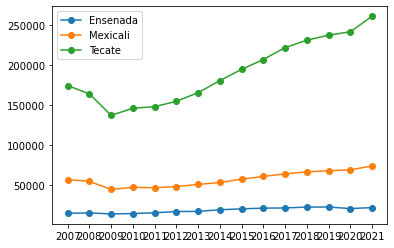

In [21]:
# Create a graphic 

x1 = df2["Year"]
y1 = df2["Ensenada"]

x2 = df2["Year"]
y2 = df2["Mexicali"]

x3 = df2["Year"]
y3 = df2["Tecate"]

x3 = df2["Year"]
y3 = df2["Tijuana"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Ensenada")
ax.plot(x2, y2, marker = "o", label = "Mexicali")
ax.plot(x3, y3, marker = "o", label = "Tecate")


ax.legend()

# plt.show()

In [22]:
dfson.columns

Index(['Hermosillo', 'Nogales', 'Otros municipios', 'Total Sonora', 'Year'], dtype='object')

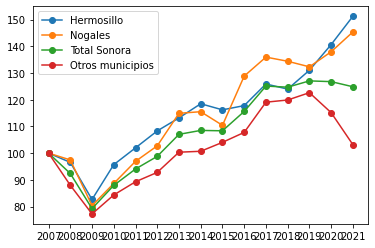

In [23]:
# Create a graphic 

x1 = dfson["Year"]
y1 = dfson["Hermosillo"]

x2 = dfson["Year"]
y2 = dfson["Nogales"]

x4 = dfson["Year"]
y4 = dfson["Total Sonora"]


x3 = dfson["Year"]
y3 = dfson["Otros municipios"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Hermosillo")
ax.plot(x2, y2, marker = "o", label = "Nogales")
ax.plot(x4, y4, marker = "o", label = "Total Sonora")
ax.plot(x3, y3, marker = "o", label = "Otros municipios")


ax.legend()

# plt.show()

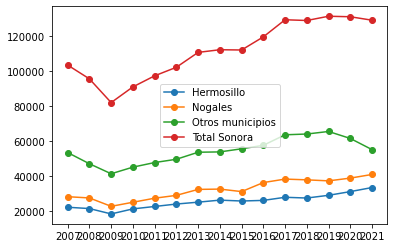

In [24]:
# Create a graphic 

x1 = df3["Year"]
y1 = df3["Hermosillo"]

x2 = df3["Year"]
y2 = df3["Nogales"]

x3 = df3["Year"]
y3 = df3["Otros municipios"]

x4 = df3["Year"]
y4 = df3["Total Sonora"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Hermosillo")
ax.plot(x2, y2, marker = "o", label = "Nogales")
ax.plot(x3, y3, marker = "o", label = "Otros municipios")
ax.plot(x4, y4, marker = "o", label = "Total Sonora")


ax.legend()

# plt.show()

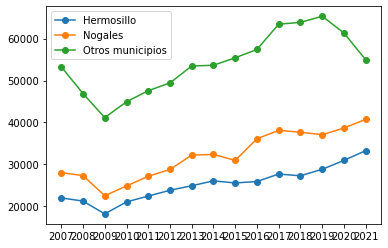

In [25]:
# Create a graphic 

x1 = df3["Year"]
y1 = df3["Hermosillo"]

x2 = df3["Year"]
y2 = df3["Nogales"]

x3 = df3["Year"]
y3 = df3["Otros municipios"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Hermosillo")
ax.plot(x2, y2, marker = "o", label = "Nogales")
ax.plot(x3, y3, marker = "o", label = "Otros municipios")


ax.legend()

# plt.show()

In [26]:
dftam.columns

Index(['Matamoros', 'Nuevo Laredo', 'Otros municipios', 'Reynosa',
       'Total Tamaulipas', 'Year'],
      dtype='object')

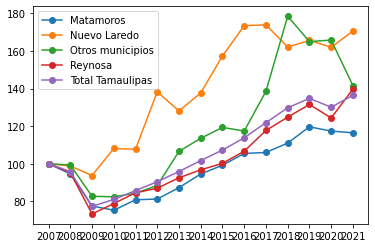

In [27]:
# Create a graphic 

x1 = dftam["Year"]
y1 = dftam["Matamoros"]

x2 = dftam["Year"]
y2 = dftam["Nuevo Laredo"]

x3 = dftam["Year"]
y3 = dftam["Otros municipios"]

x4 = dftam["Year"]
y4 = dftam["Reynosa"]

x5 = dftam["Year"]
y5 = dftam["Total Tamaulipas"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Matamoros")
ax.plot(x2, y2, marker = "o", label = "Nuevo Laredo")
ax.plot(x3, y3, marker = "o", label = "Otros municipios")
ax.plot(x4, y4, marker = "o", label = "Reynosa")
ax.plot(x5, y5, marker = "o", label = "Total Tamaulipas")


ax.legend()

# plt.show()

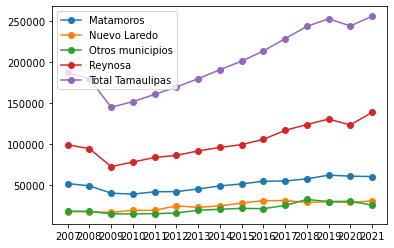

In [28]:
# Create a graphic 

x1 = df4["Year"]
y1 = df4["Matamoros"]

x2 = df4["Year"]
y2 = df4["Nuevo Laredo"]

x3 = df4["Year"]
y3 = df4["Otros municipios"]

x4 = df4["Year"]
y4 = df4["Reynosa"]

x5 = df4["Year"]
y5 = df4["Total Tamaulipas"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Matamoros")
ax.plot(x2, y2, marker = "o", label = "Nuevo Laredo")
ax.plot(x3, y3, marker = "o", label = "Otros municipios")
ax.plot(x4, y4, marker = "o", label = "Reynosa")
ax.plot(x5, y5, marker = "o", label = "Total Tamaulipas")

ax.legend()

# plt.show()

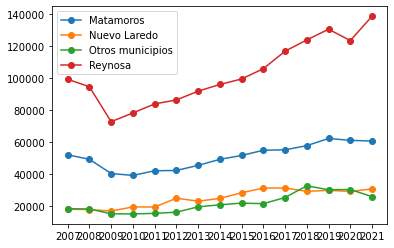

In [29]:
# Create a graphic 

x1 = df4["Year"]
y1 = df4["Matamoros"]

x2 = df4["Year"]
y2 = df4["Nuevo Laredo"]

x3 = df4["Year"]
y3 = df4["Otros municipios"]

x4 = df4["Year"]
y4 = df4["Reynosa"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Matamoros")
ax.plot(x2, y2, marker = "o", label = "Nuevo Laredo")
ax.plot(x3, y3, marker = "o", label = "Otros municipios")
ax.plot(x4, y4, marker = "o", label = "Reynosa")

ax.legend()

# plt.show()

In [30]:
dfcoa.columns

Index(['Acuña', 'Otros municipios', 'Ramos Arizpe', 'Saltillo', 'Torreon',
       'Total Coahuila', 'Year'],
      dtype='object')

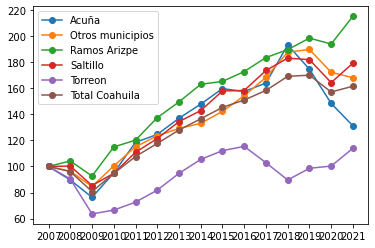

In [31]:
# Create a graphic 

x1 = dfcoa["Year"]
y1 = dfcoa["Acuña"]

x2 = dfcoa["Year"]
y2 = dfcoa["Otros municipios"]

x3 = dfcoa["Year"]
y3 = dfcoa["Ramos Arizpe"]

x4 = dfcoa["Year"]
y4 = dfcoa["Saltillo"]

x5 = dfcoa["Year"]
y5 = dfcoa["Torreon"]

x6 = dfcoa["Year"]
y6 = dfcoa["Total Coahuila"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Acuña")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Ramos Arizpe")
ax.plot(x4, y4, marker = "o", label = "Saltillo")
ax.plot(x5, y5, marker = "o", label = "Torreon")
ax.plot(x6, y6, marker = "o", label = "Total Coahuila")

ax.legend()

# plt.show()

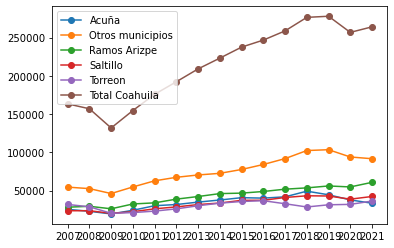

In [32]:
# Create a graphic 

x1 = df5["Year"]
y1 = df5["Acuña"]

x2 = df5["Year"]
y2 = df5["Otros municipios"]

x3 = df5["Year"]
y3 = df5["Ramos Arizpe"]

x4 = df5["Year"]
y4 = df5["Saltillo"]

x5 = df5["Year"]
y5 = df5["Torreon"]

x6 = df5["Year"]
y6 = df5["Total Coahuila"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Acuña")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Ramos Arizpe")
ax.plot(x4, y4, marker = "o", label = "Saltillo")
ax.plot(x5, y5, marker = "o", label = "Torreon")
ax.plot(x6, y6, marker = "o", label = "Total Coahuila")

ax.legend()

# plt.show()

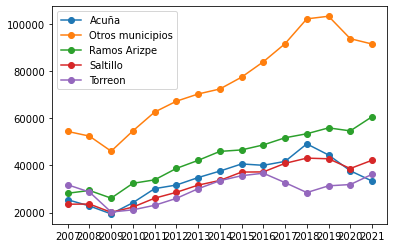

In [33]:
# Create a graphic 

x1 = df5["Year"]
y1 = df5["Acuña"]

x2 = df5["Year"]
y2 = df5["Otros municipios"]

x3 = df5["Year"]
y3 = df5["Ramos Arizpe"]

x4 = df5["Year"]
y4 = df5["Saltillo"]

x5 = df5["Year"]
y5 = df5["Torreon"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Acuña")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Ramos Arizpe")
ax.plot(x4, y4, marker = "o", label = "Saltillo")
ax.plot(x5, y5, marker = "o", label = "Torreon")

ax.legend()

# plt.show()

In [34]:
dfchi.columns

Index(['Chihuahua', 'Juarez', 'Otros municipios', 'Total Chihuahua', 'Year'], dtype='object')

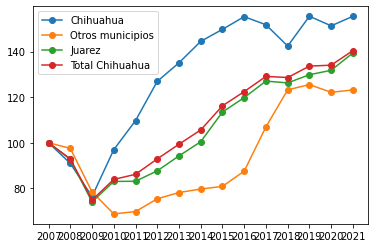

In [35]:
# Create a graphic 

x1 = dfchi["Year"]
y1 = dfchi["Chihuahua"]

x2 = dfchi["Year"]
y2 = dfchi["Otros municipios"]

x3 = dfchi["Year"]
y3 = dfchi["Juarez"]

x4 = dfchi["Year"]
y4 = dfchi["Total Chihuahua"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Chihuahua")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Juarez")
ax.plot(x4, y4, marker = "o", label = "Total Chihuahua")

ax.legend()

# plt.show()

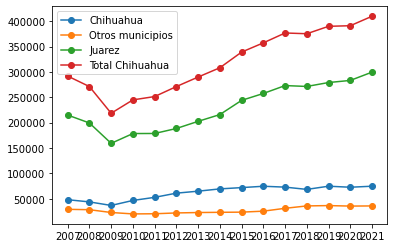

In [36]:
# Create a graphic 

x1 = df6["Year"]
y1 = df6["Chihuahua"]

x2 = df6["Year"]
y2 = df6["Otros municipios"]

x3 = df6["Year"]
y3 = df6["Juarez"]

x4 = df6["Year"]
y4 = df6["Total Chihuahua"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Chihuahua")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Juarez")
ax.plot(x4, y4, marker = "o", label = "Total Chihuahua")

ax.legend()

# plt.show()

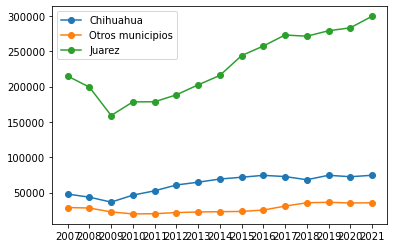

In [37]:
# Create a graphic 

x1 = df6["Year"]
y1 = df6["Chihuahua"]

x2 = df6["Year"]
y2 = df6["Otros municipios"]

x3 = df6["Year"]
y3 = df6["Juarez"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Chihuahua")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Juarez")

ax.legend()

# plt.show()

In [38]:
dfnl.columns

Index(['Apodaca', 'Guadalupe', 'Monterrey', 'Otros municipios',
       'San Nicolas de los Garza', 'Santa Catarina', 'Total Nuevo Leon',
       'Year'],
      dtype='object')

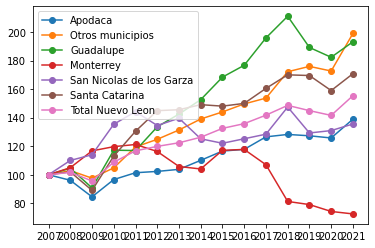

In [39]:
# Create a graphic 

x1 = dfnl["Year"]
y1 = dfnl["Apodaca"]

x2 = dfnl["Year"]
y2 = dfnl["Otros municipios"]

x3 = dfnl["Year"]
y3 = dfnl["Guadalupe"]

x4 = dfnl["Year"]
y4 = dfnl["Monterrey"]

x5 = dfnl["Year"]
y5 = dfnl["San Nicolas de los Garza"]

x6 = dfnl["Year"]
y6 = dfnl["Santa Catarina"]

x7 = dfnl["Year"]
y7 = dfnl["Total Nuevo Leon"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Apodaca")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Guadalupe")
ax.plot(x4, y4, marker = "o", label = "Monterrey")
ax.plot(x5, y5, marker = "o", label = "San Nicolas de los Garza")
ax.plot(x6, y6, marker = "o", label = "Santa Catarina")
ax.plot(x7, y7, marker = "o", label = "Total Nuevo Leon")

ax.legend()

# plt.show()

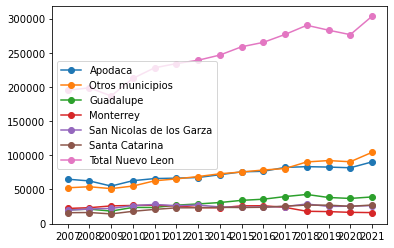

In [40]:
# Create a graphic 

x1 = df7["Year"]
y1 = df7["Apodaca"]

x2 = df7["Year"]
y2 = df7["Otros municipios"]

x3 = df7["Year"]
y3 = df7["Guadalupe"]

x4 = df7["Year"]
y4 = df7["Monterrey"]

x5 = df7["Year"]
y5 = df7["San Nicolas de los Garza"]

x6 = df7["Year"]
y6 = df7["Santa Catarina"]

x7 = df7["Year"]
y7 = df7["Total Nuevo Leon"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Apodaca")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Guadalupe")
ax.plot(x4, y4, marker = "o", label = "Monterrey")
ax.plot(x5, y5, marker = "o", label = "San Nicolas de los Garza")
ax.plot(x6, y6, marker = "o", label = "Santa Catarina")
ax.plot(x7, y7, marker = "o", label = "Total Nuevo Leon")

ax.legend()

# plt.show()

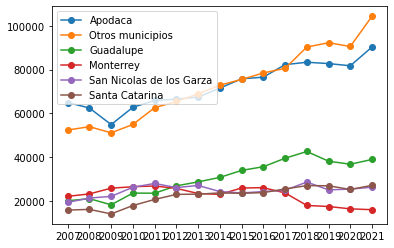

In [41]:
# Create a graphic 

x1 = df7["Year"]
y1 = df7["Apodaca"]

x2 = df7["Year"]
y2 = df7["Otros municipios"]

x3 = df7["Year"]
y3 = df7["Guadalupe"]

x4 = df7["Year"]
y4 = df7["Monterrey"]

x5 = df7["Year"]
y5 = df7["San Nicolas de los Garza"]

x6 = df7["Year"]
y6 = df7["Santa Catarina"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Apodaca")
ax.plot(x2, y2, marker = "o", label = "Otros municipios")
ax.plot(x3, y3, marker = "o", label = "Guadalupe")
ax.plot(x4, y4, marker = "o", label = "Monterrey")
ax.plot(x5, y5, marker = "o", label = "San Nicolas de los Garza")
ax.plot(x6, y6, marker = "o", label = "Santa Catarina")

ax.legend()

# plt.show()